In [19]:
from keras import models
from keras import layers
from keras.utils import to_categorical

from keras.datasets import reuters

### Load the data

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(8982,)

In [6]:
train_labels.shape

(8982,)

In [5]:
test_data.shape

(2246,)

In [7]:
test_labels.shape

(2246,)

In [124]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [126]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Prepare the data

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 
    return results

In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train.shape

(8982, 10000)

In [18]:
x_test.shape

(2246, 10000)

In [22]:
y_train = to_categorical(train_labels, num_classes=46)
y_test = to_categorical(test_labels, num_classes=46)

In [23]:
y_train.shape

(8982, 46)

In [25]:
y_test.shape

(2246, 46)

### Build the network

In [137]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [138]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', metrics=['accuracy'])

### Train the network

In [139]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [140]:
x_val.shape

(1000, 10000)

In [141]:
partial_x_train.shape

(7982, 10000)

In [142]:
y_val.shape

(1000, 46)

In [143]:
partial_y_train.shape

(7982, 46)

In [144]:
model_history = model.fit(partial_x_train, partial_y_train, 
          epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 196us/step - loss: 2.5882 - acc: 0.5128 - val_loss: 1.7147 - val_acc: 0.6450
Epoch 2/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.4042 - acc: 0.7077 - val_loss: 1.3039 - val_acc: 0.7200
Epoch 3/20
7982/7982 [==============================] - 1s 124us/step - loss: 1.0518 - acc: 0.7727 - val_loss: 1.1172 - val_acc: 0.7560
Epoch 4/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.8319 - acc: 0.8218 - val_loss: 1.0146 - val_acc: 0.7900
Epoch 5/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.6608 - acc: 0.8646 - val_loss: 0.9603 - val_acc: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.5335 - acc: 0.8910 - val_loss: 0.9350 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.4285 - acc: 0.9123 - val_loss: 0.9019 - val_acc: 0.8150


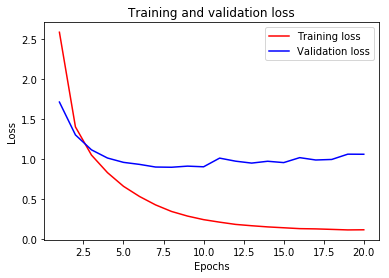

In [150]:
import matplotlib.pyplot as plt

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

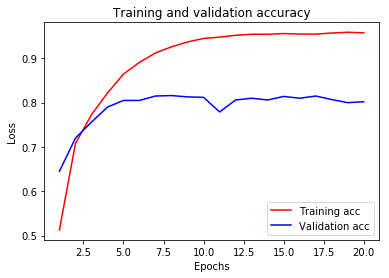

In [153]:
plt.clf()                                                

acc = model_history.history['acc']
val_acc = model_history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Test the model

In [154]:
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 137us/step


[1.2479729030350968, 0.7858414959928762]

In [165]:
#Random Baseline has around 19% accuracy
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits = np.array(test_labels) == np.array(test_labels_copy)
np.sum(hits) / len(test_labels)

0.19056099732858414

In [166]:
predictions = model.predict(x_test)

In [168]:
predictions[0].shape

(46,)

In [171]:
np.sum(predictions[2])

1.0000001

In [174]:
np.argmax(predictions, axis=1)

array([ 3, 10,  1, ...,  3,  4,  1])

In [175]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])